# Project 1 - Blog Post

### Analyzing Effectiveness of STD Drug Data
In this project we were using a dataset which is given as data science competetion on hackerearth platform.There are three questions we are going to answer. Explanation and visualization will be presented in order to answer each question.
We are going to use the `train.csv` file.




### Questions:
- What are the top 10 most effective drug according to patient rating ? 
- How the use case of drug is distributed among different diseases ?
- Which drugs have more no of prescription ?


## Data Acquisition & Preparation 


In [29]:
#import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,7)})

In [73]:
#import the dataset 
train=pd.read_csv("train.csv")


In [4]:
#Get the first 5 rows of train data
train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


## Data Cleaning

In [77]:
#Checking is there any null value present in the train 
train.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [78]:
#Statistical summary of the train set
train.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


In [10]:
#Getting the info about the features 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
patient_id                    32165 non-null int64
name_of_drug                  32165 non-null object
use_case_for_drug             32165 non-null object
review_by_patient             32165 non-null object
effectiveness_rating          32165 non-null int64
drug_approved_by_UIC          32165 non-null object
number_of_times_prescribed    32165 non-null int64
base_score                    32165 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


As to answer the above three questions we checked and prepared the data with following steps:
 - Viewed the first five rows of dataset to know what type of data it is like either fully numrical or fully categorical or mixed.
 - It is found that dataset we are using is mixed of numerical and categorical values.
 - Now we checked every column to find the NaN values in the dataset.
 - Now after finding the sum of nan values in the dataset it found that fully cleaned data set we have.
 - Calculated the statistical summary of the numerical column.
 
### Data Exploration

## 1. Top 10 most effective drug according to patient rating

In [84]:
#Finding the top ten drug by grouping with effectiveness rating of the drug
top_ten_drug=train.groupby('name_of_drug')["effectiveness_rating"].count().sort_values(ascending=False).head(10)


In [85]:
#showing the data
top_ten_drug

name_of_drug
Levonorgestrel                        724
Etonogestrel                          628
Ethinyl estradiol / norethindrone     547
Ethinyl estradiol / norgestimate      425
Nexplanon                             397
Ethinyl estradiol / levonorgestrel    394
Phentermine                           296
Sertraline                            281
Escitalopram                          265
Mirena                                241
Name: effectiveness_rating, dtype: int64

In [96]:
train.groupby('name_of_drug')["effectiveness_rating"].count().sort_values(ascending=False).head(64)

name_of_drug
Levonorgestrel                                            724
Etonogestrel                                              628
Ethinyl estradiol / norethindrone                         547
Ethinyl estradiol / norgestimate                          425
Nexplanon                                                 397
Ethinyl estradiol / levonorgestrel                        394
Phentermine                                               296
Sertraline                                                281
Escitalopram                                              265
Mirena                                                    241
Venlafaxine                                               213
Depo-Provera                                              209
Implanon                                                  207
Duloxetine                                                199
Bupropion / naltrexone                                    198
Medroxyprogesterone                                      

In [86]:
#creating the data for top 10 drug name 
drug_name=["Levonorgestrel","Etonogestrel","Ethinyl estradiol / norethindrone","Ethinyl estradiol / norgestimate","Nexplanon",
            "Ethinyl estradiol / levonorgestrel","Phentermine","Sertraline","Escitalopram","Mirena"]
#taking the total count of drugs 
count=dd.values



In [89]:
#total no of drug
train['name_of_drug'].unique().shape[0]


2220

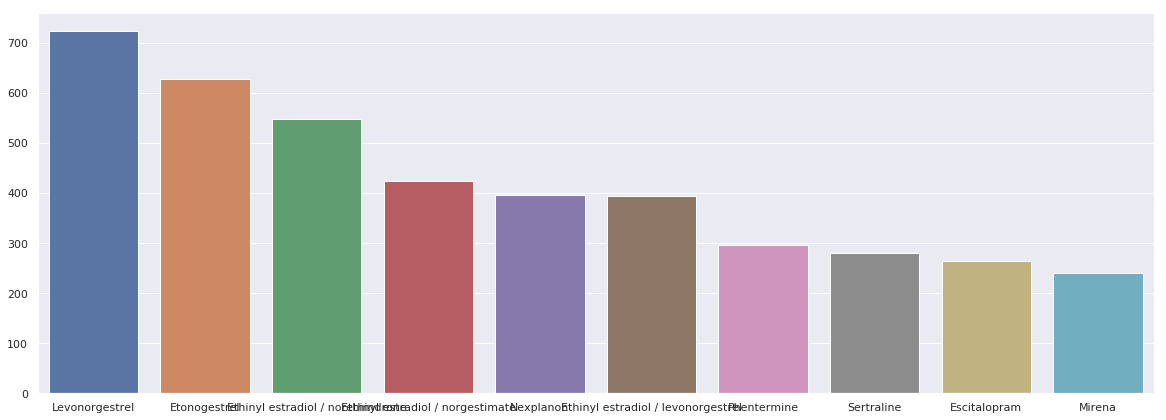

In [87]:
#plotting the newly framed data
sns.barplot(x=drug_name, y=count)

As the dataset have total no of 2220 unique drugs in which 63 different types of drug have more that 100 repeatation in the drug list.
According to the above barchart it is clear that the top 10 drugs are `"Levonorgestrel","Etonogestrel","Ethinyl estradiol / norethindrone","Ethinyl estradiol / norgestimate","Nexplanon","Ethinyl estradiol /levonorgestrel","Phentermine","Sertraline","Escitalopram","Mirena"` have been used used much more time and sold too among the 2220 other drugs. 

So,the most frequently used drug is Levonorgestrel drug. 

## 2. Distribution of use case of drug among different diseases

In [47]:
#finding the most common reason for taking the drug
reason_behind_drug_taking = train['use_case_for_drug'].value_counts().head(10)
m=pd.DataFrame(reason_behind_drug_taking)


In [48]:
#dataframe in between use_case_for_drug and their value_counts
m

,use_case_for_drug
Birth Control,5795
Depression,1791
Pain,1273
Anxiety,1174
Acne,1101
Bipolar Disorde,815
Insomnia,772
Obesity,727
Weight Loss,717
ADHD,627


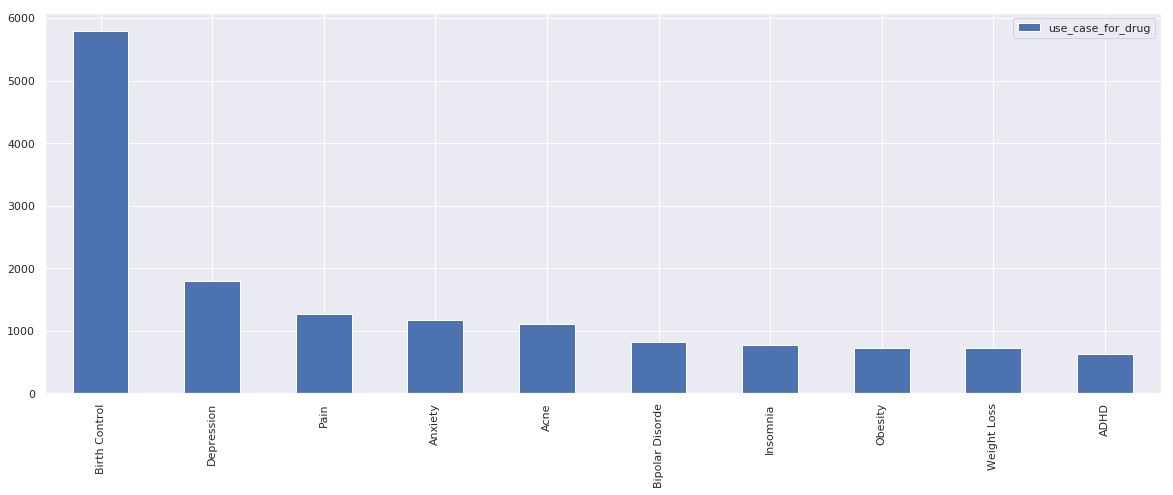

In [53]:
#visualizing the above dataframe 
m.plot(kind='bar')


Every drug have their own usecase and they made for that particular use. As,looking around the dataset there are 2220 no of unique drugs with their 
use case and we found the top 10 most effective drugs likewise it is found that there are many different types of usecase of drug. 
Now, the main goal is to get the most frequent usecase of the drug with their distribution. 

From above chart it is clearly saying that Birth Control is the main reason behind taking most of the drug.From above barchart, it depicts that patients are taking the drug for balancing the population of the country.
And second most important fact that most of the patient have taken the drug in cure of depression and to relief the pain.

## 3. Drugs having more no of prescription

In [69]:
# finding the drusg name having more no of prescription
prescribed=train.groupby('name_of_drug')['number_of_times_prescribed'].mean().sort_values(ascending=False).head(10)

In [98]:
prescribed

name_of_drug
Alendronate      220.666667
Glucophage XR    184.000000
Glucotrol        161.000000
Kapvay           158.000000
Zyloprim         144.000000
Carac            144.000000
Casodex          137.000000
Prolia           134.375000
Gralise          131.000000
Femara           126.000000
Name: number_of_times_prescribed, dtype: float64

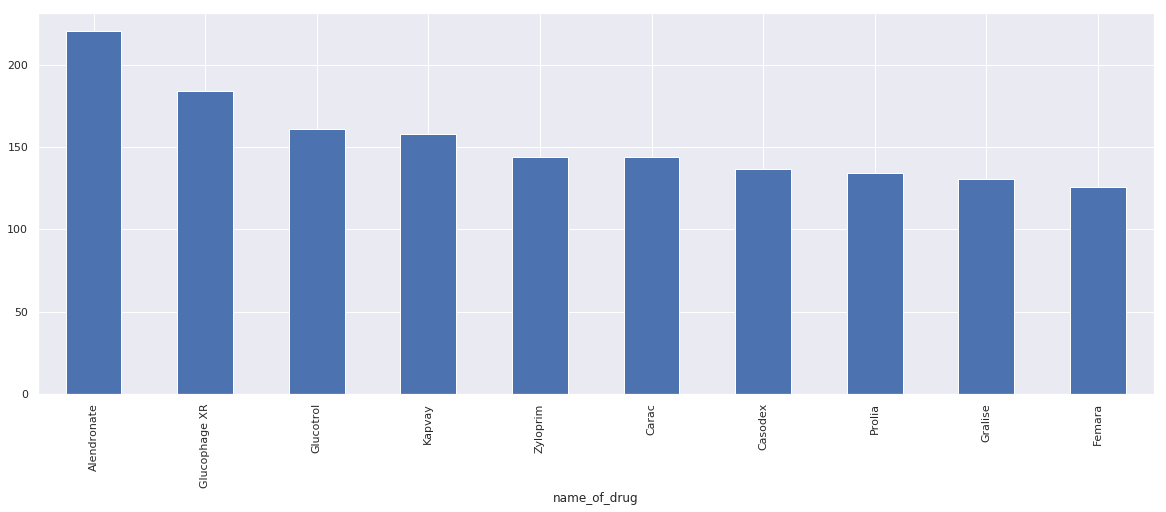

In [70]:
#ploting the prescription drug list 
prescribed.plot(kind='bar')

According to research human always prefer recommendation, in same way drug is also prescribed by doctors. 
To answer the above question, We have to gather the group by data with `name_of_drug` and `number_of_times_prescribed` by the doctors. 
Now, after getting the required data and by plotting it shows that around 250(taking as mean) times "Alendronate" named drug is frequenty prescribed by drug and in the same distribution about 175 times "Glucophage XR" this drug is prescribed. As a result,taking it to a business approach all pharmacy can put as stock of these top ten drugs on their stock.which are most frequent selling drugs prescribed by doctors. 

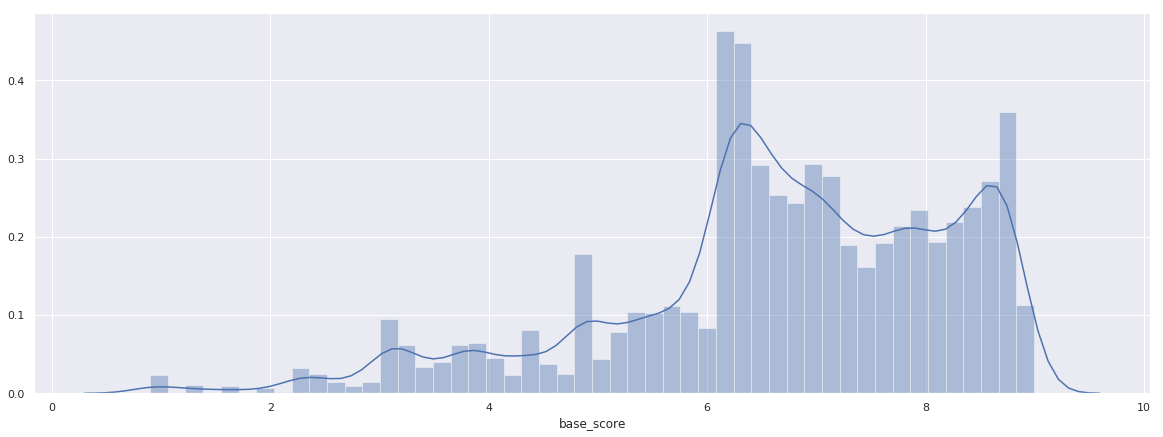

In [76]:
#plotting the distribution plot of base score of the drug
sns.distplot(train['base_score'])

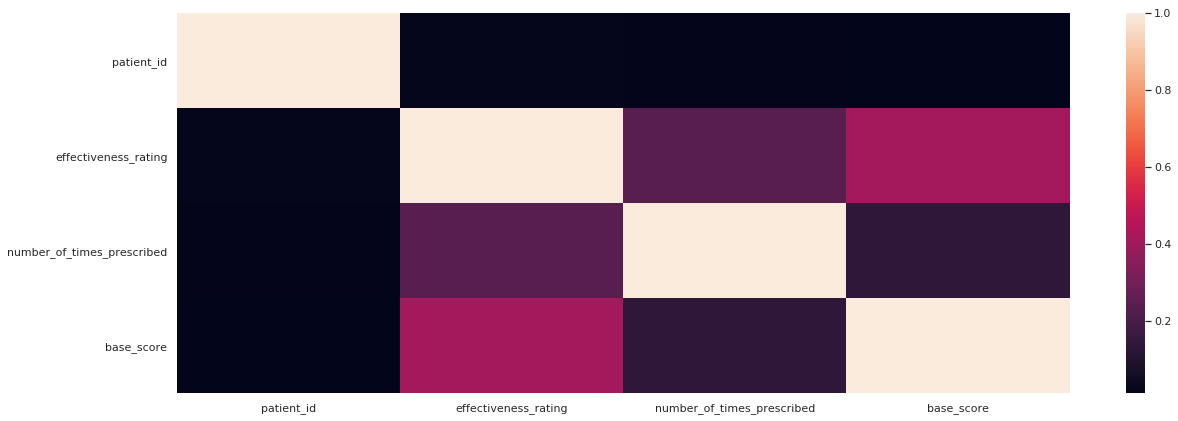

In [72]:
#to know how the dataset is correlated with other columns
sns.heatmap(train.corr())

## Conclusion 

In this notebook we did the analysis about drugs effectiveness, and these are the summary of what we have done.

We measure the job satisfaction level for each country and found that United States has the highest job satisfaction level in the world, and 5 of top 10 countries with the highest job satisfaction level are located in Europe.
We then looked at their undergraduate major and found that developers whose undergraduate major is not IT-related have slightly better job satisfaction.
Finally, we found that developers who contribute more to the open source have the higher salary.